# Clustering_AbsenteeismAtWork

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [206]:
emp_absent=pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',delimiter=';')
emp_absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [207]:
emp_absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [208]:
emp_absent.shape

(740, 21)

In [209]:
emp_absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [212]:


#Make a copy of dataframe
df = emp_absent.copy()



In [213]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Univariate Analysis

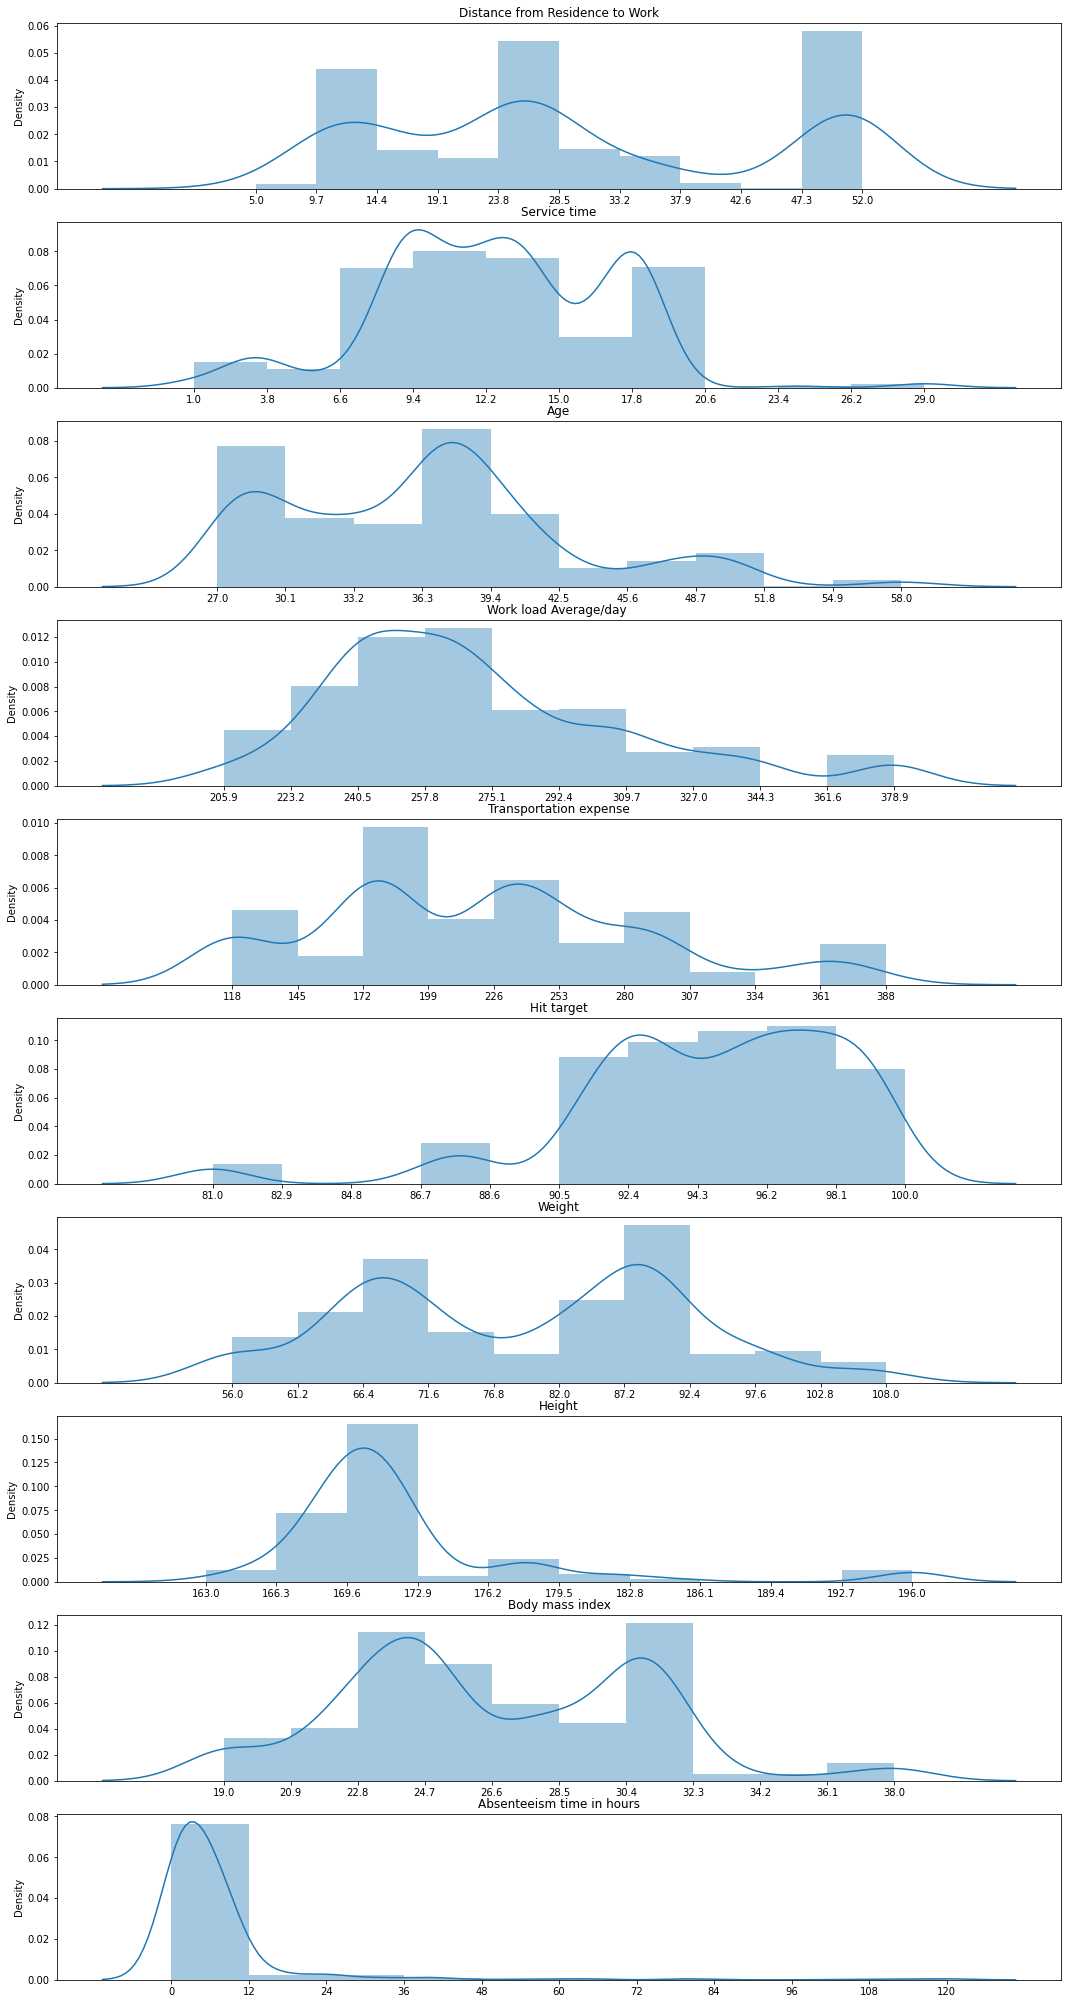

In [214]:
#Check the bar graph of numerical Data
b=list(enumerate(continuous_vars))
plt.figure(figsize=(18,36))
for x in b:
    plt.subplot(10,1,x[0]+1)
    sns.distplot(x=df[x[1]],bins=10)
    plt.xticks(np.linspace(min(df[x[1]]),max(df[x[1]]),11)) 
    plt.title(x[1])
plt.show()

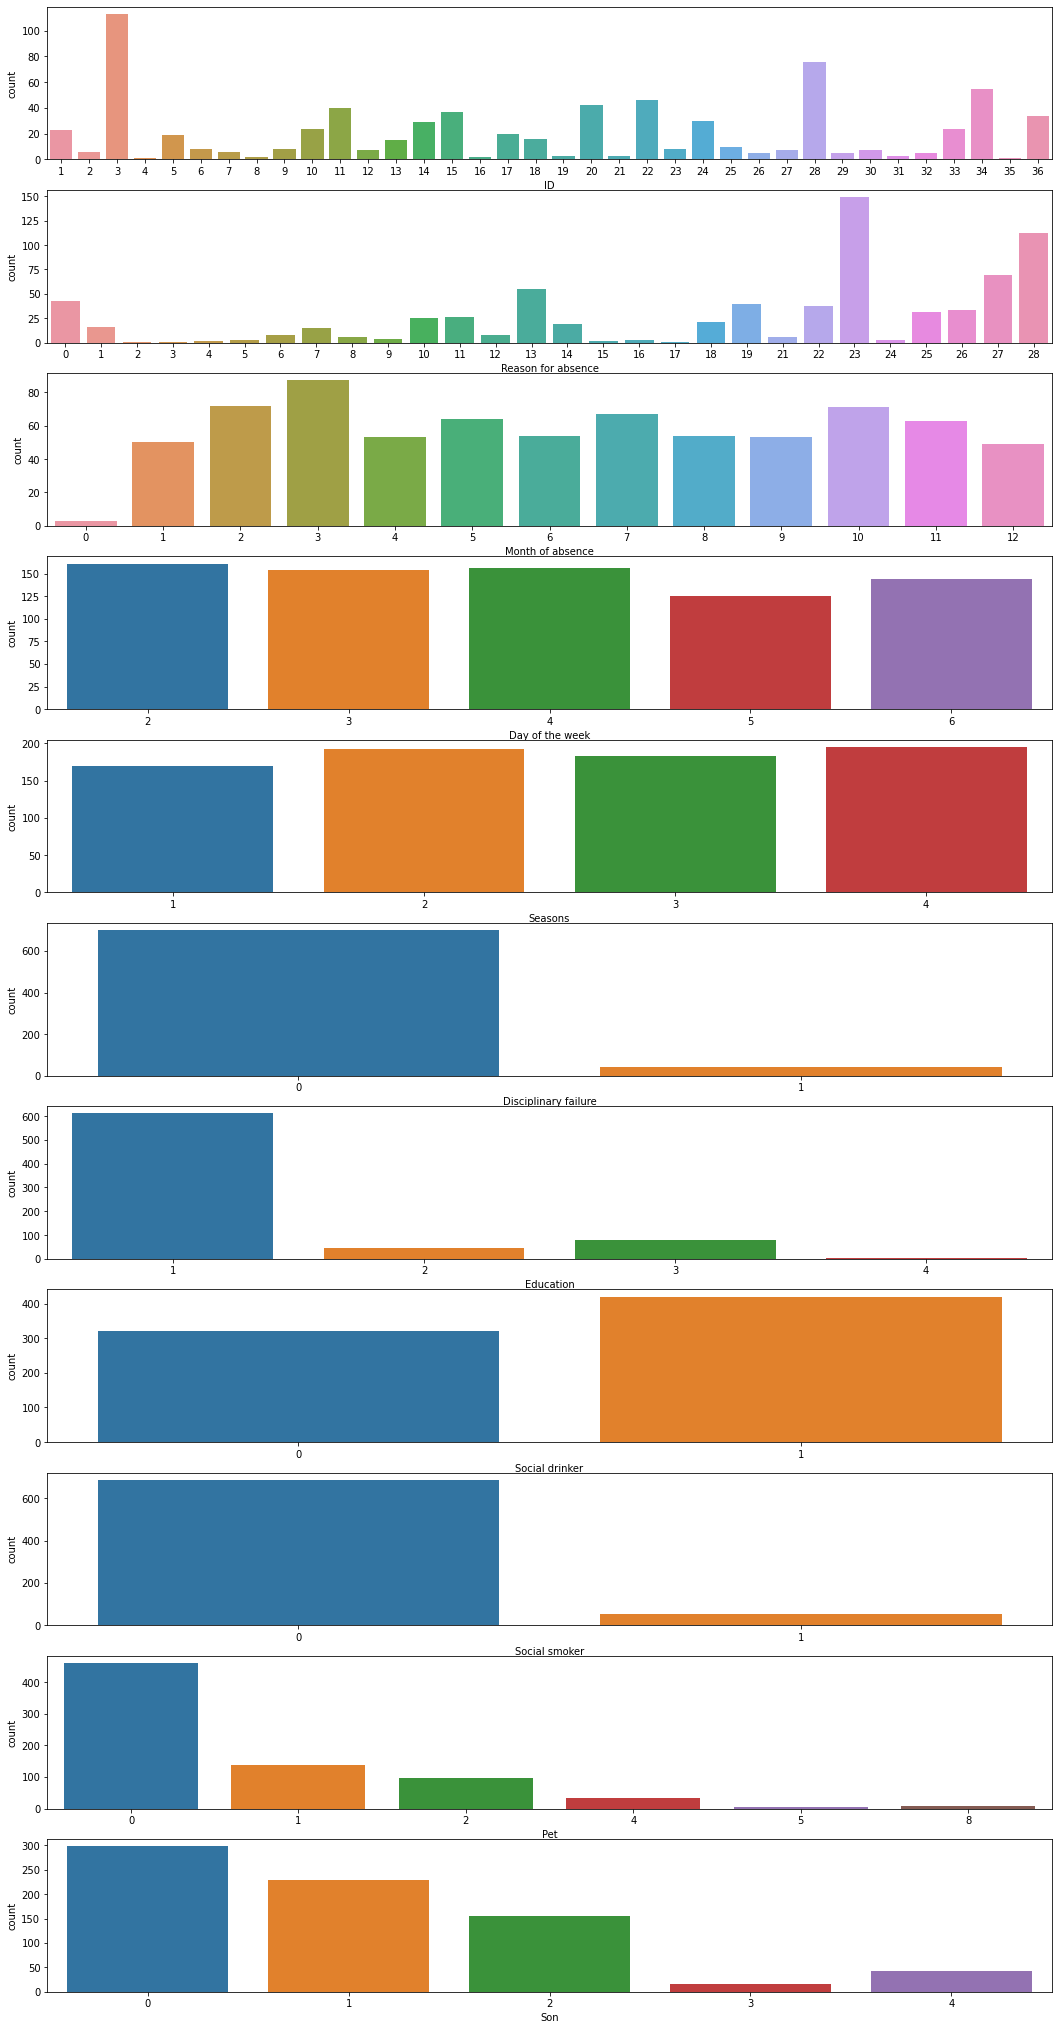

In [215]:
#Check the bar graph of categorical Data
b=list(enumerate(categorical_vars))
plt.figure(figsize=(18,50))
for x in b:
    plt.subplot(15,1,x[0]+1)
    sns.countplot(x=df[x[1]]) 
plt.show()

# Unvariate Analysis ( Only for absenteis)

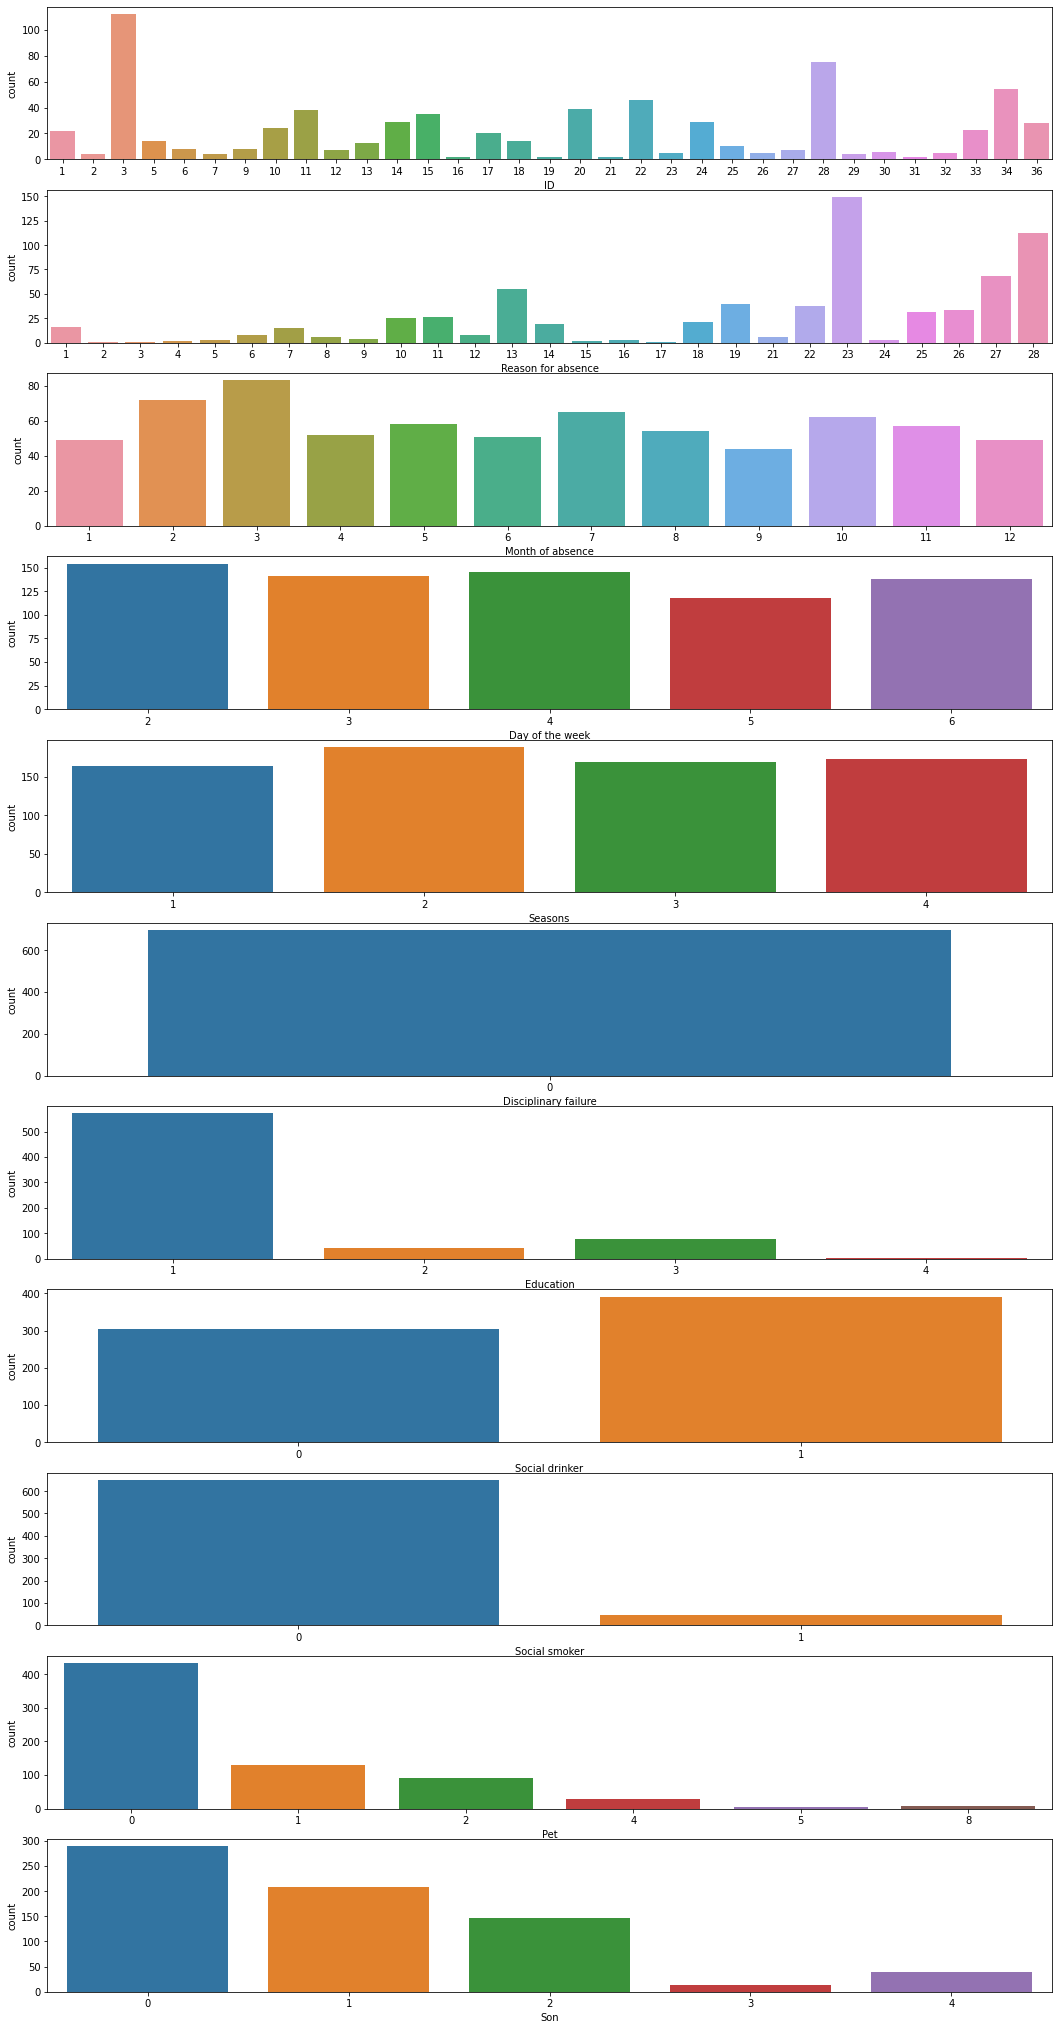

In [216]:
b=list(enumerate(categorical_vars))
plt.figure(figsize=(18,50))
for x in b:
    plt.subplot(15,1,x[0]+1)
    sns.countplot(x=df[df['Absenteeism time in hours']!=0][x[1]]) 
plt.show()

Employees with ID 3, 28 and 34 are some of the employees who are absent the most.

It can be observed that employees having education only till high school tend to be absent 

The reasons most used by employees to be absent are reason 13, 20, 23 and 28. These reasons include Medical consultation, Dental appointments, morbidity, mortality and diseases of musculoskeletal system and connective tissue.

People who tend to be social drinkers tend to be more absent than those who don’t drink. 

Employees are absent the most on Mondays and Tuesdays.

Employees are absent the most on season 2.

Employees having a maximum of two children or no child at all are absent the most.


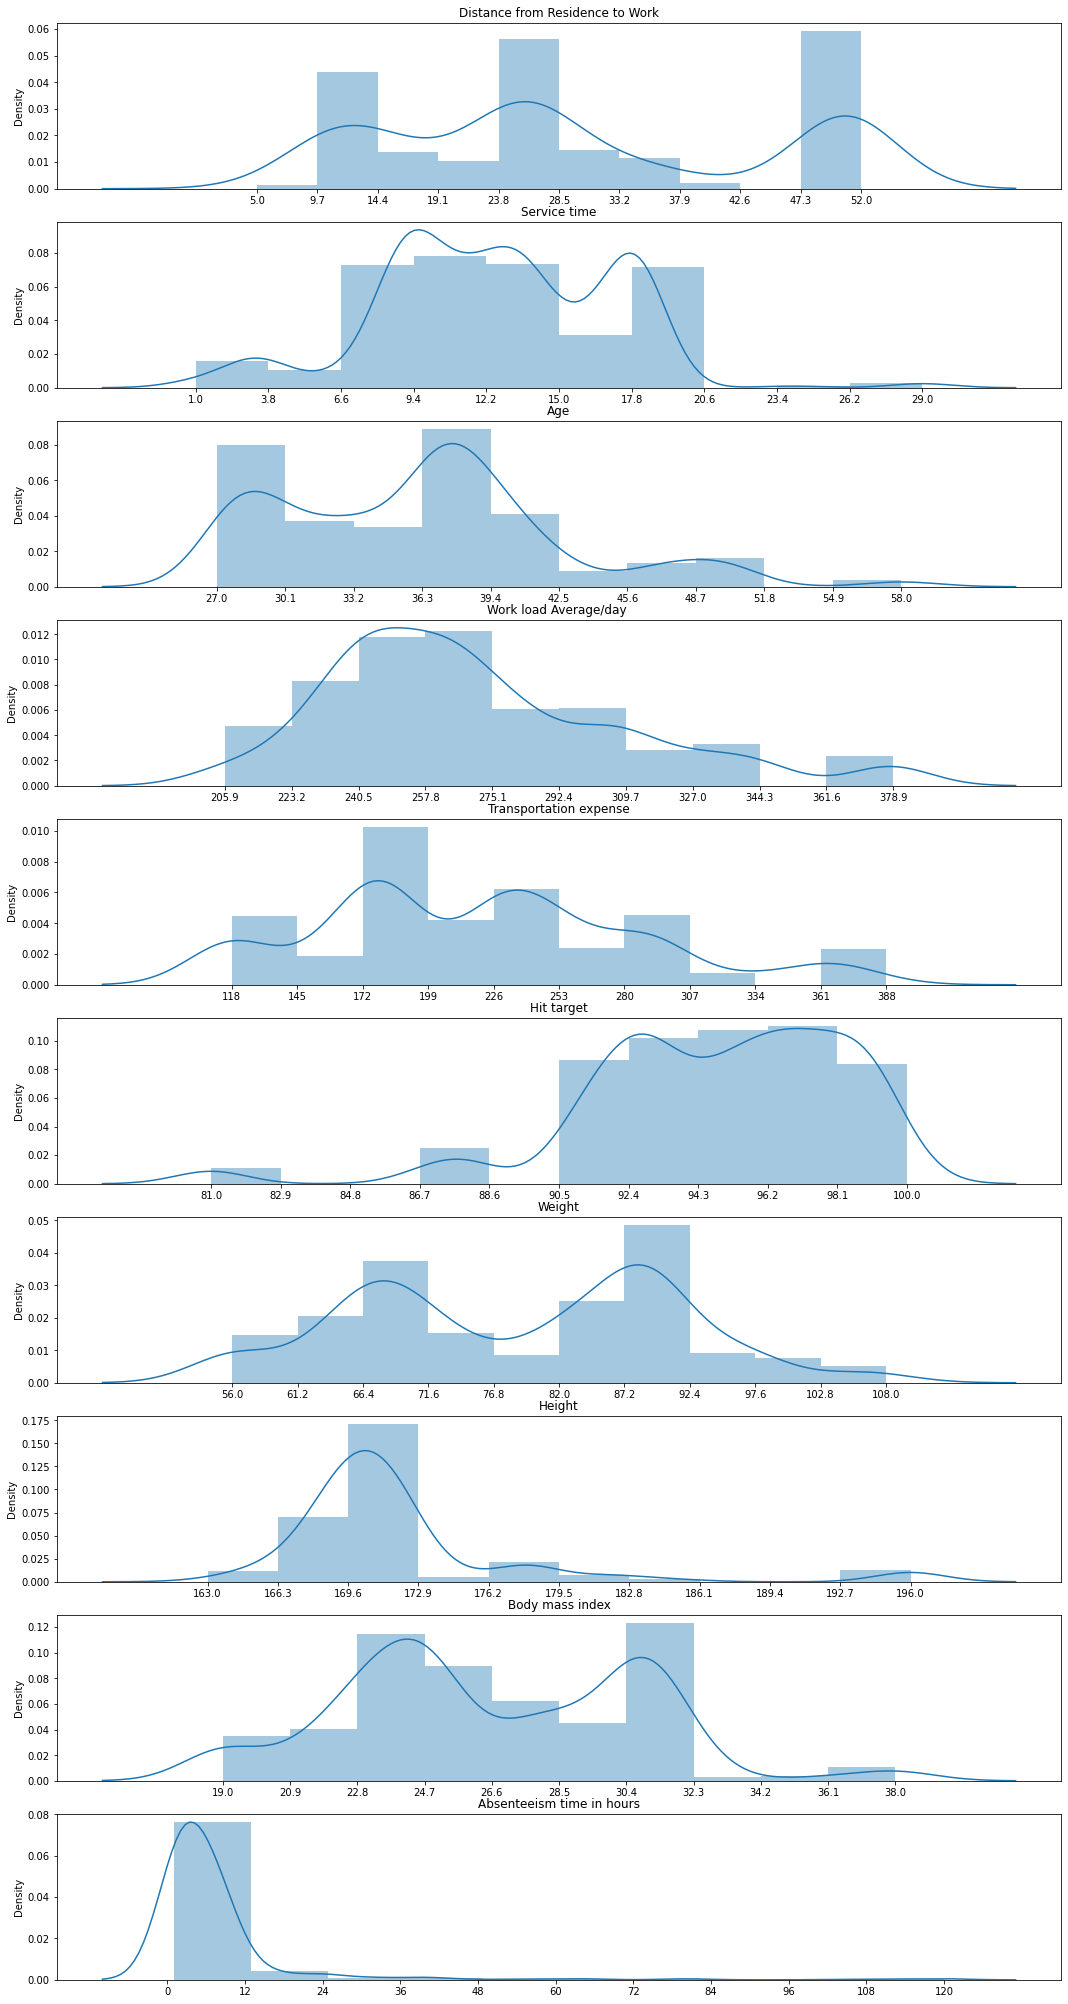

In [217]:
#Check the bar graph of numerical Data
b=list(enumerate(continuous_vars))
plt.figure(figsize=(18,36))
for x in b:
    plt.subplot(10,1,x[0]+1)
    sns.distplot(x=df[df['Absenteeism time in hours']!=0][x[1]],bins=10)
    plt.xticks(np.linspace(min(df[x[1]]),max(df[x[1]]),11))
    plt.title(x[1]) 
plt.show()

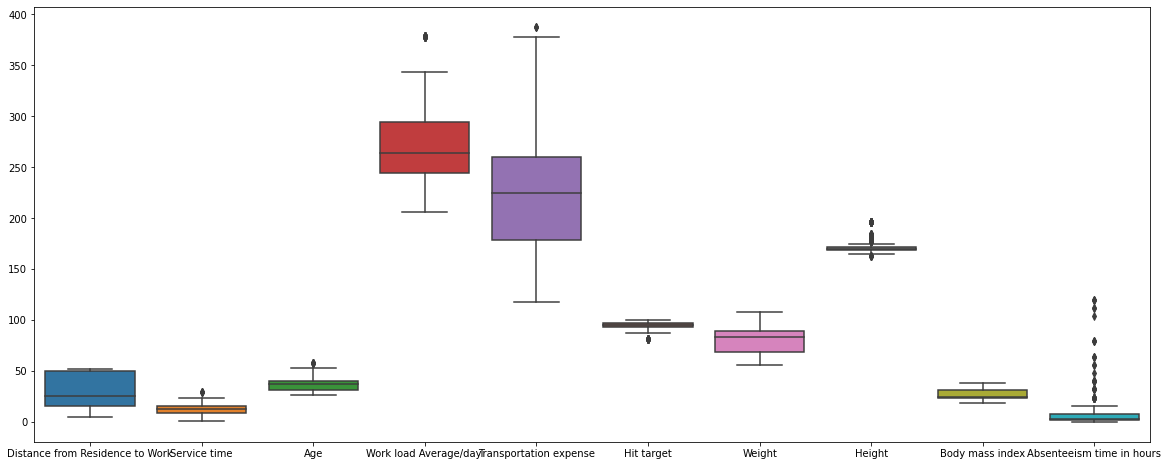

In [218]:
#Check for outliers in data using boxplot
plt.figure(figsize=(20,8))
sns.boxplot(data=df[continuous_vars])
plt.show()

[]

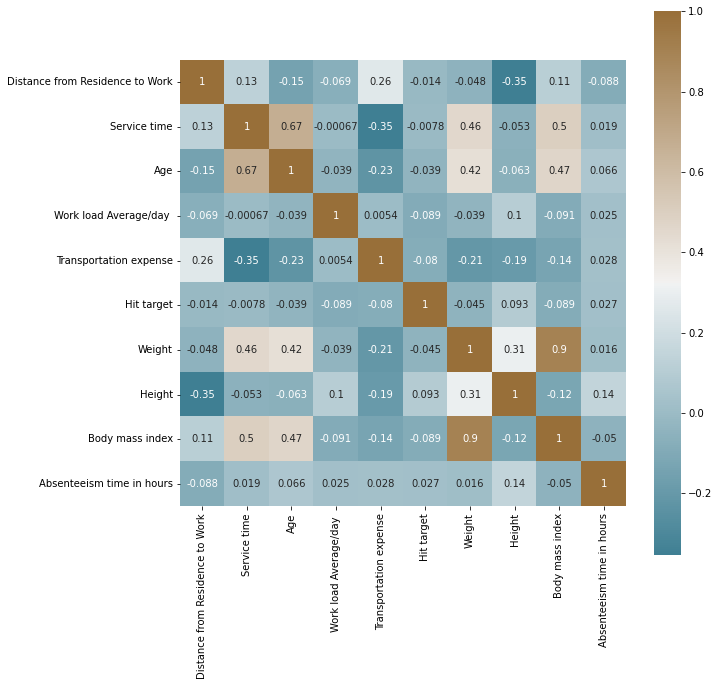

In [219]:

df_corr = df.loc[:,continuous_vars]
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr.corr(), mask=np.zeros_like(df_corr.corr(), dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [220]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

no. of cluster: 2 ,distortion: 2807953.651081919 ,silhouette avg: 0.37776373610596786
no. of cluster: 3 ,distortion: 2175522.5615407545 ,silhouette avg: 0.30106609765958203
no. of cluster: 4 ,distortion: 1735736.7802496864 ,silhouette avg: 0.35813089278407156
no. of cluster: 5 ,distortion: 1460344.6429845393 ,silhouette avg: 0.33828266623753045
no. of cluster: 6 ,distortion: 1241487.5903101284 ,silhouette avg: 0.35116327328758484
no. of cluster: 7 ,distortion: 1084567.353550756 ,silhouette avg: 0.3380109780530895
no. of cluster: 8 ,distortion: 1000661.2314783683 ,silhouette avg: 0.33763054458576197
no. of cluster: 9 ,distortion: 946354.0900149434 ,silhouette avg: 0.32486581844991896


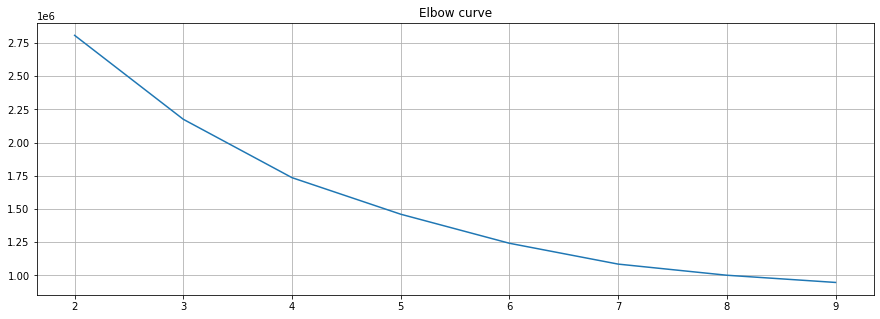

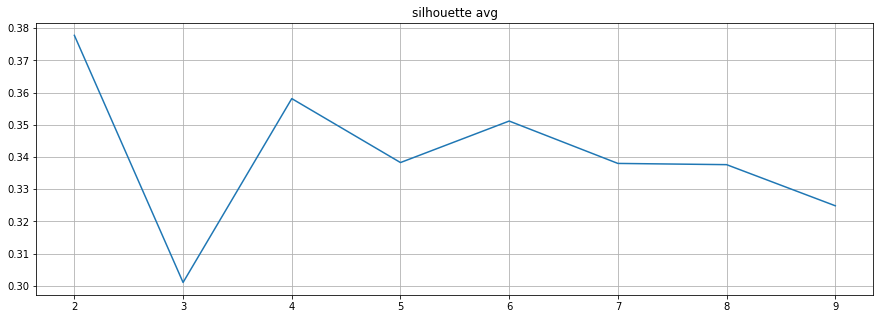

In [221]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette=[]
dist=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=2)
    cluster=kmeans.fit(df.iloc[:,1:])
    distorion=kmeans.inertia_
    cluster_label=cluster.predict(df.iloc[:,1:])
    silhouette_avg = silhouette_score(df.iloc[:,1:], cluster_label)
    dist.append(distorion)
    silhouette.append(silhouette_avg)
    print('no. of cluster:',k,',distortion:',distorion,',silhouette avg:',silhouette_avg)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), dist)
plt.grid(True)
plt.title('Elbow curve')
plt.show()
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette)
plt.grid(True)
plt.title('silhouette avg')
plt.show()

# Data Mining

In [222]:
col= ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense','Hit target']
select=[]
for x in range(0,len(col)-2):
  for y in range(1,len(col)-1):
    if (x!=y) :
      select.append([col[x],col[y]])
    else:
      continue

In [223]:
id=df[df['Absenteeism time in hours']!=0][['ID','Absenteeism time in hours']]

Attributes used for cluster model:  ['Distance from Residence to Work', 'Service time']


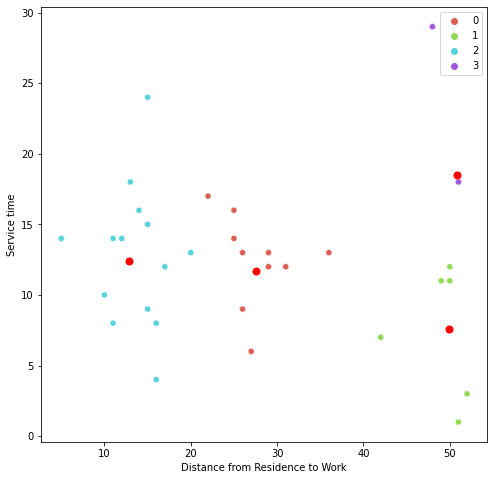

Attributes used for cluster model:  ['Distance from Residence to Work', 'Age']


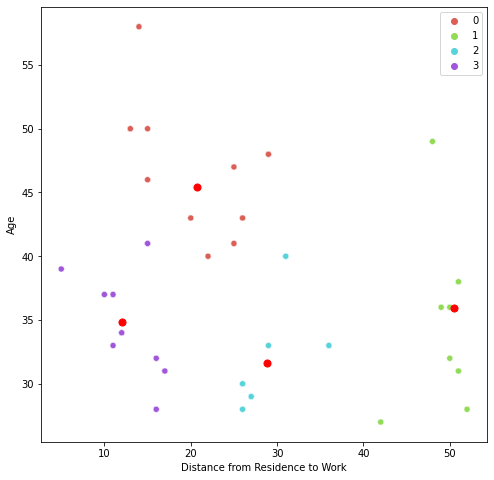

Attributes used for cluster model:  ['Distance from Residence to Work', 'Work load Average/day ']


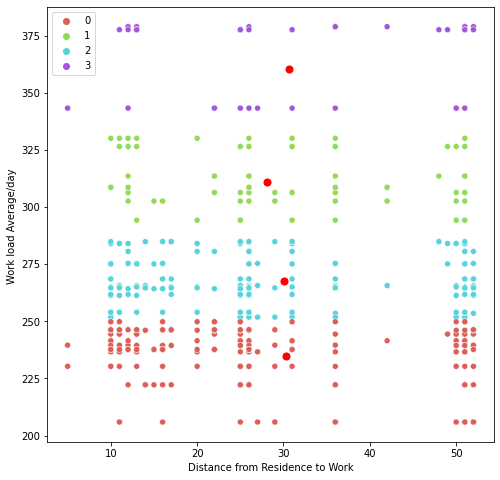

Attributes used for cluster model:  ['Distance from Residence to Work', 'Transportation expense']


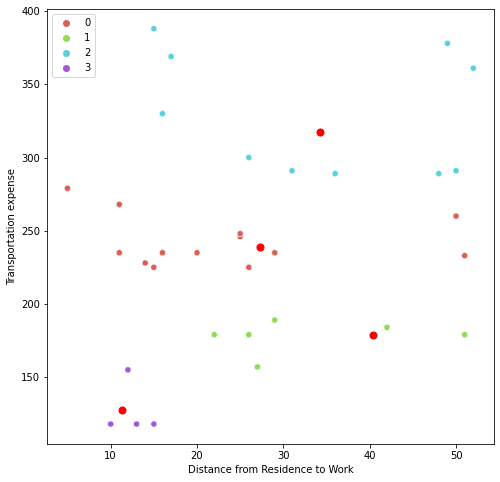

Attributes used for cluster model:  ['Service time', 'Age']


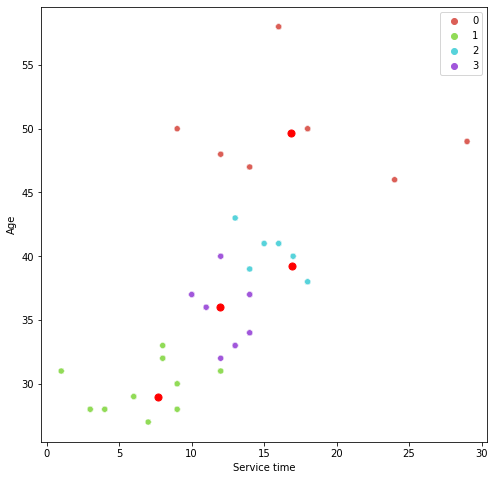

Attributes used for cluster model:  ['Service time', 'Work load Average/day ']


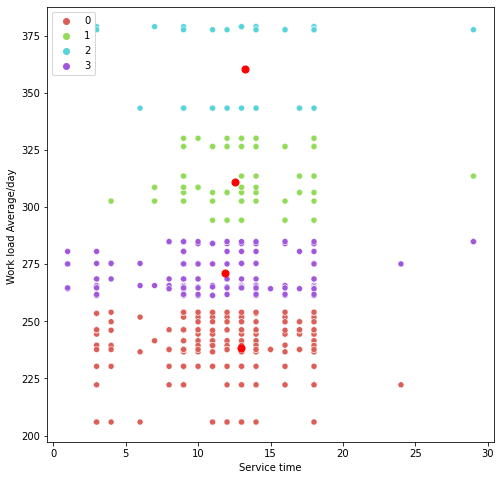

Attributes used for cluster model:  ['Service time', 'Transportation expense']


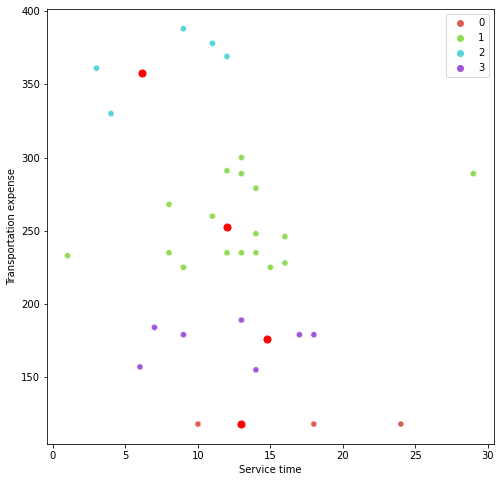

Attributes used for cluster model:  ['Age', 'Service time']


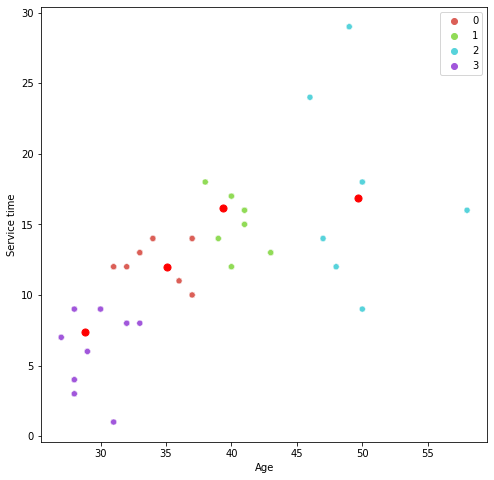

Attributes used for cluster model:  ['Age', 'Work load Average/day ']


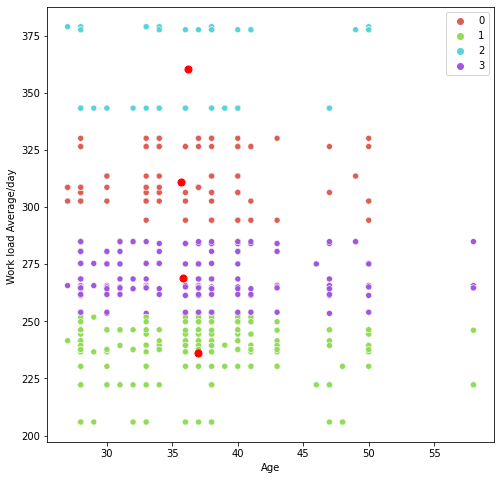

Attributes used for cluster model:  ['Age', 'Transportation expense']


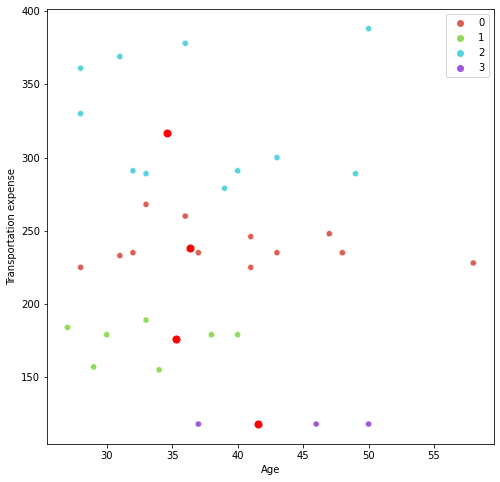

Attributes used for cluster model:  ['Work load Average/day ', 'Service time']


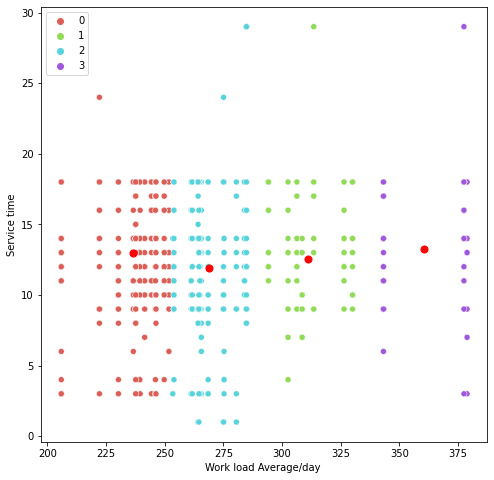

Attributes used for cluster model:  ['Work load Average/day ', 'Age']


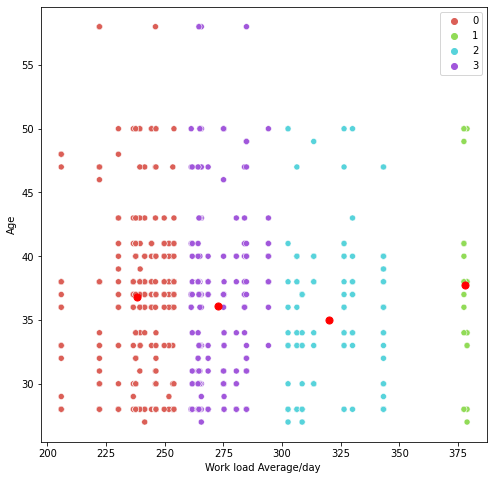

Attributes used for cluster model:  ['Work load Average/day ', 'Transportation expense']


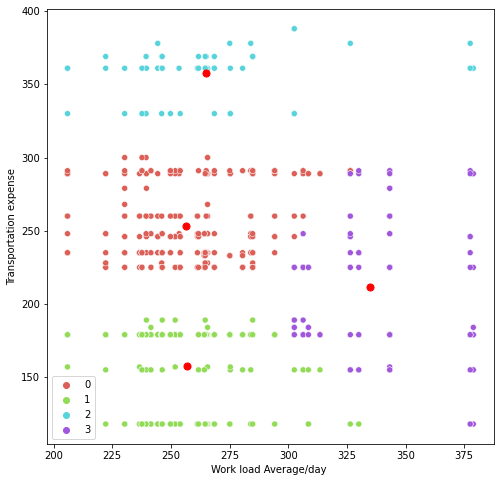

In [224]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
for x in select:
    df1  = df[df['Absenteeism time in hours']!=0][x]
    kmeans = KMeans(n_clusters=4,n_init=4).fit(df1)
    centroids = kmeans.cluster_centers_
    cluster=kmeans.predict(df1)
    id[f'{x}']=cluster
    # print(centroids)
    print('Attributes used for cluster model: ', x)
    plt.figure(figsize=(8, 8))
    sns.scatterplot(df1[x[0]], df1[x[1]], hue=kmeans.labels_, palette=sns.color_palette('hls', np.unique(kmeans.labels_).shape[0]))
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()

In [225]:
id

,ID,Absenteeism time in hours,"['Distance from Residence to Work', 'Service time']","['Distance from Residence to Work', 'Age']","['Distance from Residence to Work', 'Work load Average/day ']","['Distance from Residence to Work', 'Transportation expense']","['Service time', 'Age']","['Service time', 'Work load Average/day ']","['Service time', 'Transportation expense']","['Age', 'Service time']","['Age', 'Work load Average/day ']","['Age', 'Transportation expense']","['Work load Average/day ', 'Service time']","['Work load Average/day ', 'Age']","['Work load Average/day ', 'Transportation expense']"
0,11,4,0,2,0,2,3,0,1,0,1,2,0,0,0
2,3,2,3,1,0,1,2,0,3,1,1,1,0,0,1
3,7,4,2,3,0,0,2,0,1,1,1,2,0,0,0
4,11,2,0,2,0,2,3,0,1,0,1,2,0,0,0
5,3,2,3,1,0,1,2,0,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,8,1,1,2,2,1,3,2,3,3,2,2,3,2
733,28,8,0,2,2,0,1,3,1,3,3,0,2,3,0
734,13,80,2,3,2,2,1,3,2,0,3,2,2,3,2
735,11,8,0,2,2,2,3,3,1,0,3,2,2,3,0


In [226]:
for x in list(id.iloc[:,2:]):
  print(x)
  print(id[x].value_counts())

['Distance from Residence to Work', 'Service time']
0    289
2    206
3    117
1     84
Name: ['Distance from Residence to Work', 'Service time'], dtype: int64
['Distance from Residence to Work', 'Age']
2    208
1    201
3    152
0    135
Name: ['Distance from Residence to Work', 'Age'], dtype: int64
['Distance from Residence to Work', 'Work load Average/day ']
2    277
0    243
1    119
3     57
Name: ['Distance from Residence to Work', 'Work load Average/day '], dtype: int64
['Distance from Residence to Work', 'Transportation expense']
0    241
1    199
2    143
3    113
Name: ['Distance from Residence to Work', 'Transportation expense'], dtype: int64
['Service time', 'Age']
3    232
1    204
2    188
0     72
Name: ['Service time', 'Age'], dtype: int64
['Service time', 'Work load Average/day ']
0    299
3    221
1    119
2     57
Name: ['Service time', 'Work load Average/day '], dtype: int64
['Service time', 'Transportation expense']
1    326
3    228
0     84
2     58
Name: ['Servi

In [227]:
id1=df[df['Absenteeism time in hours']!=0][['ID','Absenteeism time in hours']]

In [228]:
!pip install hdbscan

k = 12 outlier = 68 ['Distance from Residence to Work', 'Service time']


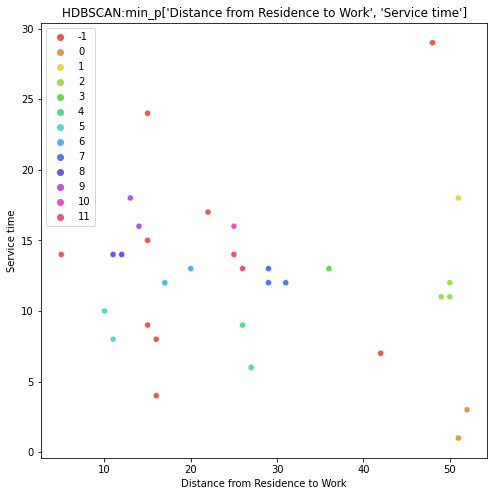

k = 12 outlier = 35 ['Distance from Residence to Work', 'Age']


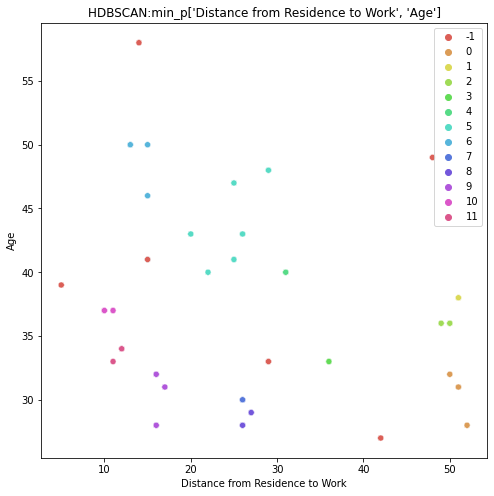

k = 4 outlier = 243 ['Distance from Residence to Work', 'Work load Average/day ']


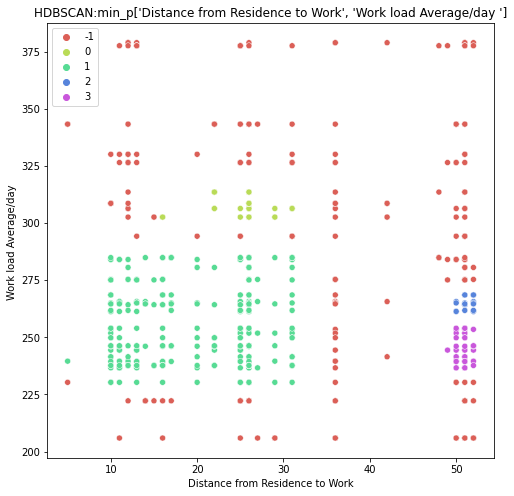

k = 12 outlier = 36 ['Distance from Residence to Work', 'Transportation expense']


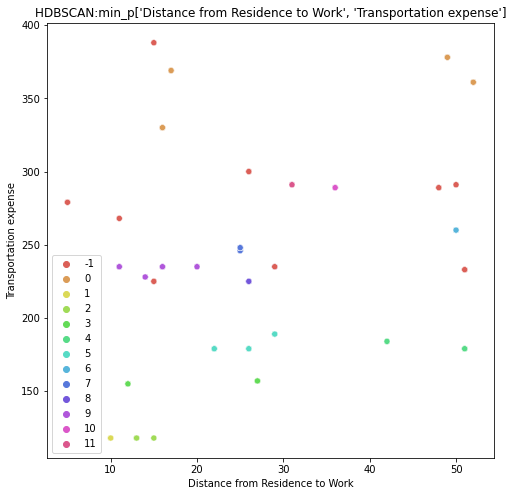

k = 13 outlier = 79 ['Service time', 'Age']


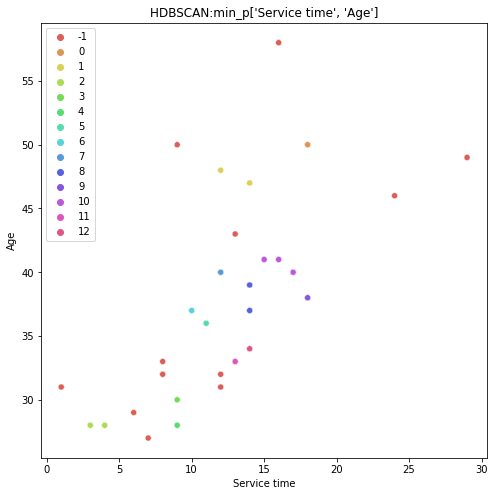

k = 8 outlier = 78 ['Service time', 'Work load Average/day ']


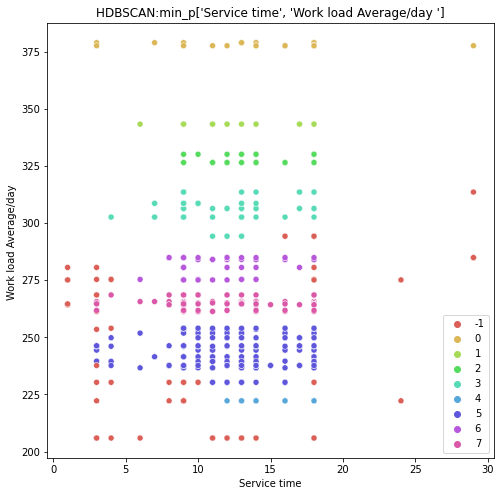

k = 12 outlier = 30 ['Service time', 'Transportation expense']


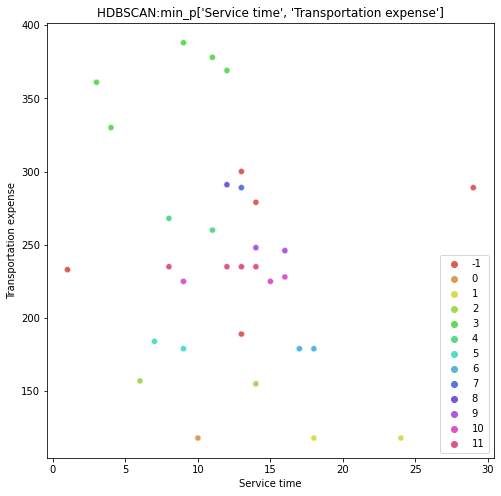

k = 13 outlier = 77 ['Age', 'Service time']


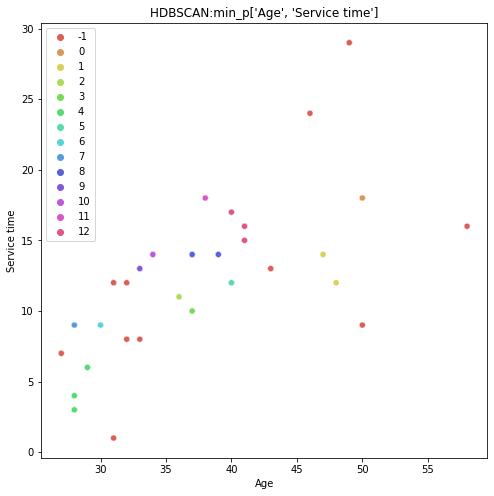

k = 6 outlier = 180 ['Age', 'Work load Average/day ']


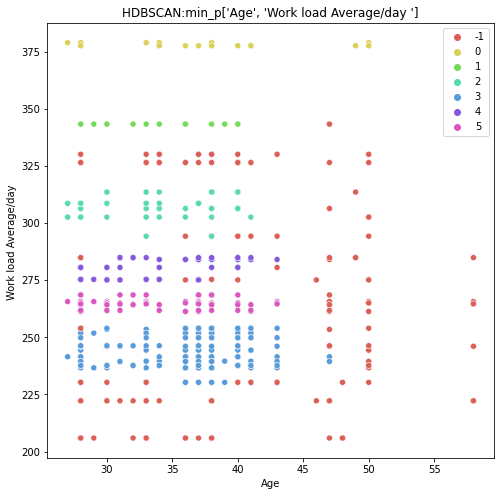

k = 12 outlier = 40 ['Age', 'Transportation expense']


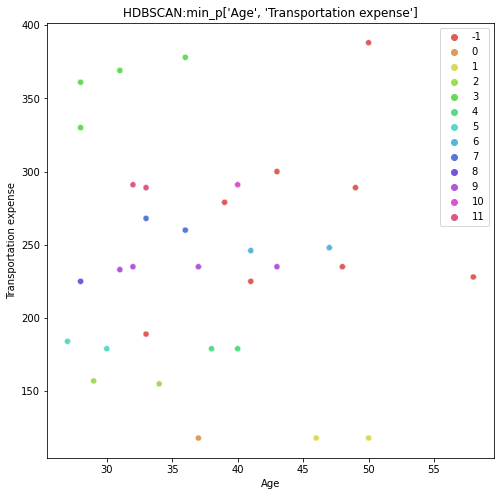

k = 8 outlier = 78 ['Work load Average/day ', 'Service time']


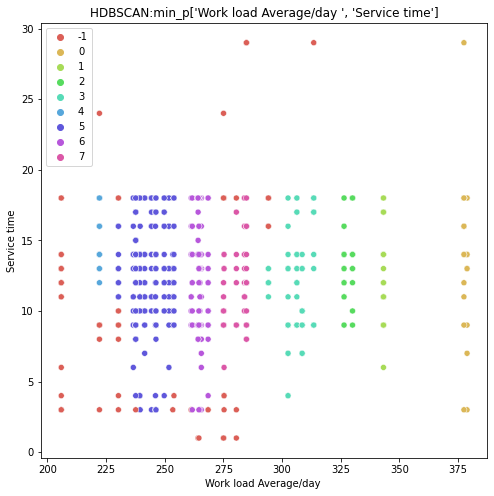

k = 6 outlier = 181 ['Work load Average/day ', 'Age']


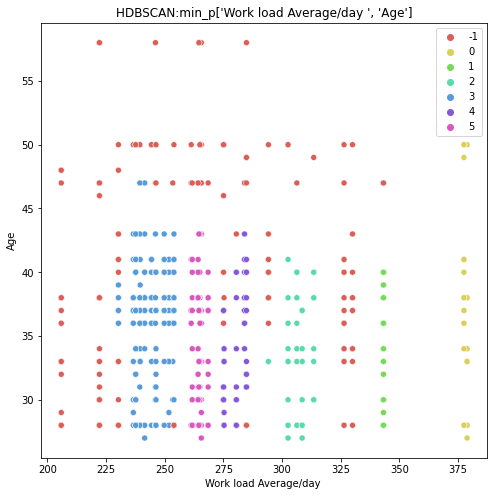

k = 6 outlier = 167 ['Work load Average/day ', 'Transportation expense']


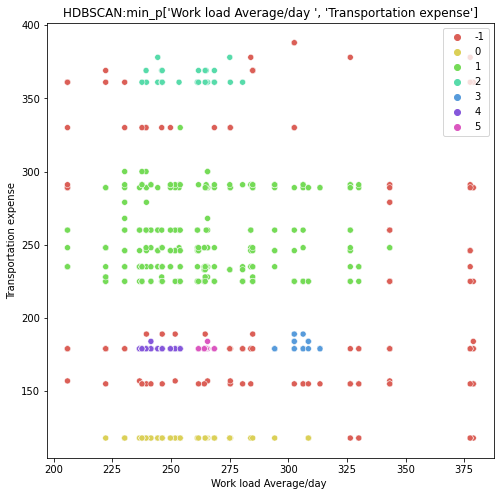

In [229]:
import hdbscan
for x in select:
    df4=df[df['Absenteeism time in hours']!=0][x]
    values = PCA().fit_transform(df4)
    hdb = hdbscan.HDBSCAN(min_cluster_size=25, gen_min_span_tree=True)
    id1[f"{x}"] = hdb.fit_predict(values)
    y_pred=id1[f"{x}"]
    k=id1[f"{x}"].max()+1
    outlier=np.sum(id1[f"{x}"]==-1)
    if k < 40:
      print('k =',k,'outlier =',outlier,x)
      fig=plt.subplots(figsize=(8,8))
      sns.scatterplot(df4[x[0]], df4[x[1]], hue=hdb.labels_, palette=sns.color_palette('hls', np.unique(hdb.labels_).shape[0]))
      plt.title(f"HDBSCAN:min_p{x}")
      plt.show()



In [230]:
for x in list(id1.iloc[:,2:]):
  print(x)
  print(id1[x].value_counts())

['Distance from Residence to Work', 'Service time']
 4     127
 1     112
-1      68
 5      56
 8      51
 7      47
 2      46
 3      38
 9      36
 0      31
 10     29
 11     28
 6      27
Name: ['Distance from Residence to Work', 'Service time'], dtype: int64
['Distance from Residence to Work', 'Age']
 1     112
 5      95
 8      81
 10     76
 7      46
 2      44
 3      38
 9      37
-1      35
 4      35
 0      33
 6      33
 11     31
Name: ['Distance from Residence to Work', 'Age'], dtype: int64
['Distance from Residence to Work', 'Work load Average/day ']
 1    310
-1    243
 3     70
 0     38
 2     35
Name: ['Distance from Residence to Work', 'Work load Average/day '], dtype: int64
['Distance from Residence to Work', 'Transportation expense']
 4     119
 8      75
 5      74
 9      55
 0      54
 1      54
 7      52
 6      39
 10     38
-1      36
 3      35
 11     35
 2      30
Name: ['Distance from Residence to Work', 'Transportation expense'], dtype: int64
['S

In [231]:
id2=df[df['Absenteeism time in hours']!=0][['ID','Absenteeism time in hours']]

n_clusters= 4 linkage = ['Distance from Residence to Work', 'Service time']


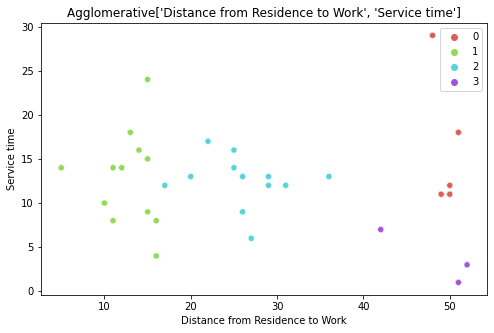

n_clusters= 4 linkage = ['Distance from Residence to Work', 'Age']


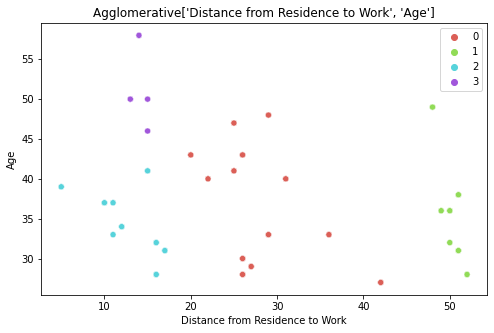

n_clusters= 4 linkage = ['Distance from Residence to Work', 'Work load Average/day ']


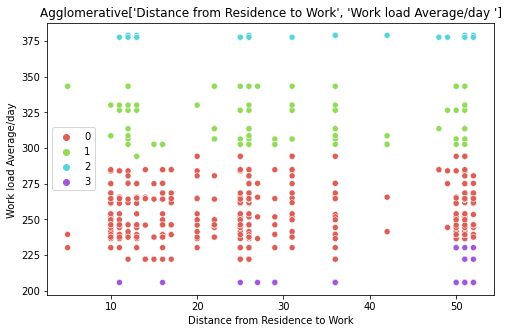

n_clusters= 4 linkage = ['Distance from Residence to Work', 'Transportation expense']


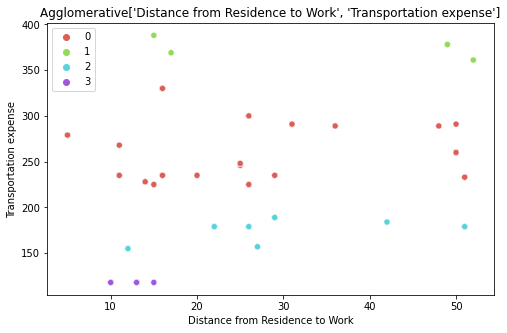

n_clusters= 4 linkage = ['Service time', 'Age']


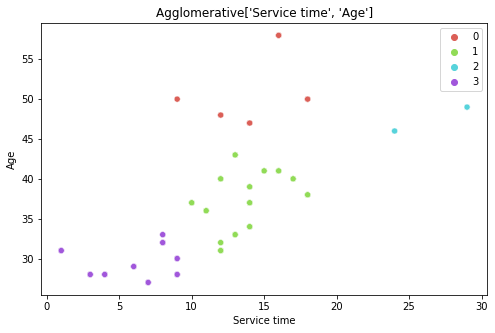

n_clusters= 4 linkage = ['Service time', 'Work load Average/day ']


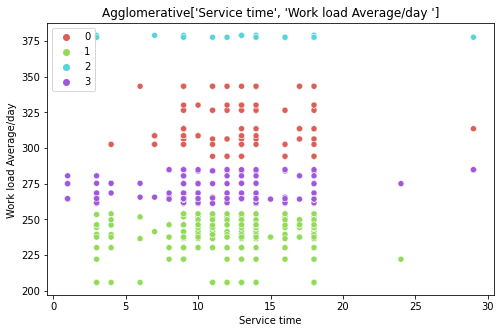

n_clusters= 4 linkage = ['Service time', 'Transportation expense']


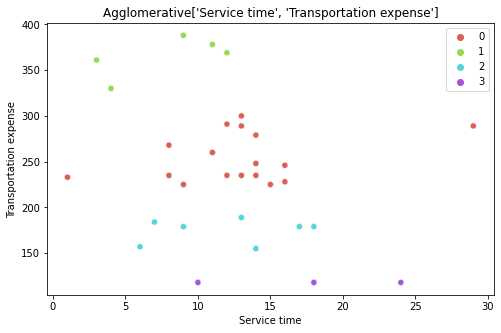

n_clusters= 4 linkage = ['Age', 'Service time']


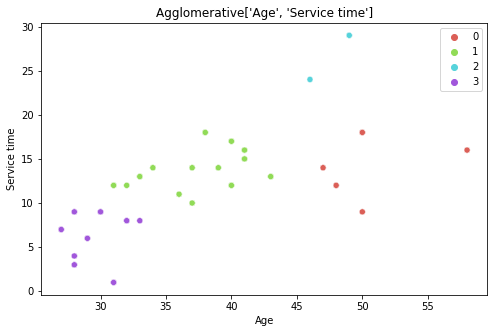

n_clusters= 4 linkage = ['Age', 'Work load Average/day ']


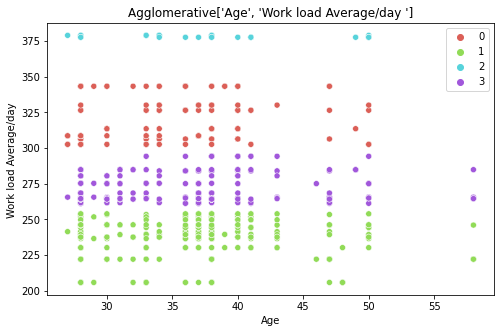

n_clusters= 4 linkage = ['Age', 'Transportation expense']


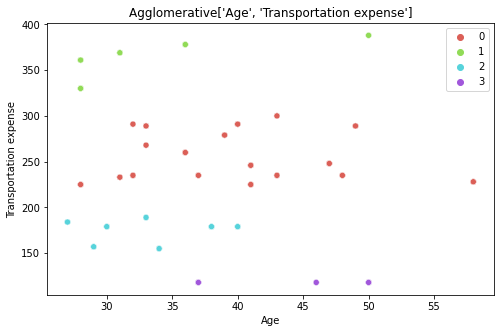

n_clusters= 4 linkage = ['Work load Average/day ', 'Service time']


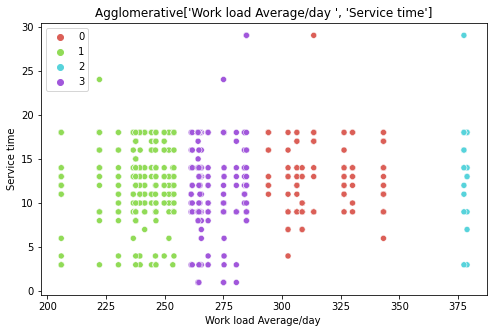

n_clusters= 4 linkage = ['Work load Average/day ', 'Age']


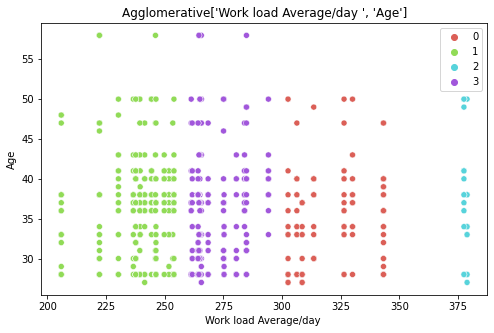

n_clusters= 4 linkage = ['Work load Average/day ', 'Transportation expense']


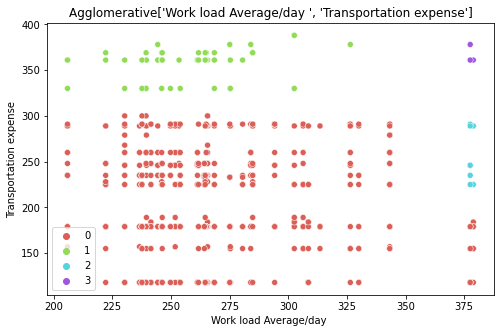

In [232]:
from sklearn.cluster import  AgglomerativeClustering
for x in select:
    df3=df[df['Absenteeism time in hours']!=0][x]
    model = AgglomerativeClustering(n_clusters= 4, linkage = 'average')
    Model = model.fit_predict(df3)
    id2[f"{x}"]=Model
    print('n_clusters=',4,'linkage =',x)
    fig=plt.subplots(figsize=(8,5))
    sns.scatterplot(df3[x[0]], df3[x[1]], hue=model.labels_, palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
    plt.title(f"Agglomerative{x}")
    plt.show()

In [233]:
for x in list(id2.iloc[:,2:]):
  print(x)
  print(id2[x].value_counts())

['Distance from Residence to Work', 'Service time']
2    316
1    179
0    163
3     38
Name: ['Distance from Residence to Work', 'Service time'], dtype: int64
['Distance from Residence to Work', 'Age']
0    310
1    194
2    152
3     40
Name: ['Distance from Residence to Work', 'Age'], dtype: int64
['Distance from Residence to Work', 'Work load Average/day ']
0    493
1    134
3     41
2     28
Name: ['Distance from Residence to Work', 'Work load Average/day '], dtype: int64
['Distance from Residence to Work', 'Transportation expense']
0    340
2    228
3     84
1     44
Name: ['Distance from Residence to Work', 'Transportation expense'], dtype: int64
['Service time', 'Age']
1    433
3    191
0     65
2      7
Name: ['Service time', 'Age'], dtype: int64
['Service time', 'Work load Average/day ']
1    299
3    221
0    148
2     28
Name: ['Service time', 'Work load Average/day '], dtype: int64
['Service time', 'Transportation expense']
0    326
2    228
3     84
1     58
Name: ['Servi

# Results

Employees with ID 3, 28 and 34 are some of the employees who are absent the most.

It can be observed that employees having education only till high school tend to be absent

The reasons most used by employees to be absent are reason 13, 20, 23 and 28. These reasons include Medical consultation, Dental appointments, morbidity, mortality and diseases of musculoskeletal system and connective tissue.

People who tend to be social drinkers tend to be more absent than those who don’t drink.

Employees are absent the most on Mondays and Tuesdays.

Employees having a maximum of two children or no child at all are absent the most.

Work load Average /day between 200 to 300 and Transportaion expense between 200 to 300 are more likely to absent.  
